# Global Imports and data sets

In [12]:
# Global imports and data sets

from sklearn import preprocessing
from sklearn.datasets import load_iris

import numpy as np
import matplotlib.pyplot as plt

iris_data = load_iris()

features = iris_data['data']

scaled_features = preprocessing.scale(features)

#each target is an integer, so we index into this array for class->color
to_color = ['yellow','blue','red']

colors = [to_color[x] for x in iris_data['target']]


numpy.ndarray

numpy.ndarray

# PCA

Put a description of the algorithm here ...

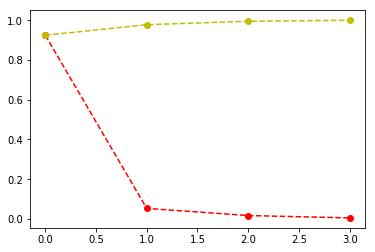

In [32]:
from sklearn.decomposition import PCA

#instantiate the pca object, set number of PC's, fit the model (determine eigenVs)
pca = PCA(n_components=4)

#explore the fit (the pca model will have state after running the 'fit' function)
pca.fit(features)

#plot the cumulative variance (yellow line) and variance as a function of each PC (by PC index)
plt.plot(pca.explained_variance_ratio_, 'ro--', np.cumsum(pca.explained_variance_ratio_), 'yo--')
plt.show()

## Using exploratory results to transform (rebase) the data

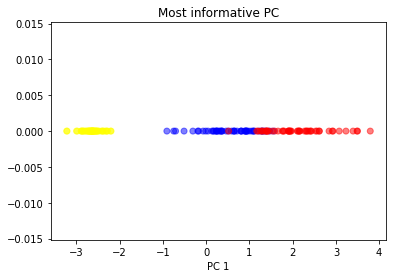

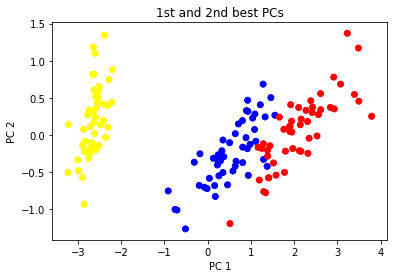

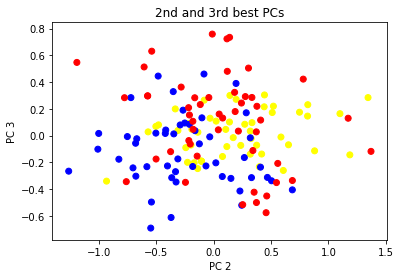

In [25]:
pcad = pca.transform(features)

#plot with single most informative component
plt.scatter(pcad[:,0], np.zeros([1,len(pcad)]),c=colors, alpha=0.5)
plt.xlabel('PC 1')
plt.title('Most informative PC')
plt.show()

#plot with 2 most informative components
plt.scatter(pcad[:,0],pcad[:,1],c=colors)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('1st and 2nd best PCs')
plt.show()

#plot without most informative component
plt.scatter(pcad[:,1],pcad[:,2],c=colors)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title('2nd and 3rd best PCs')
plt.show()


# t-SNE

Put some intuition for the technique here ... maybe taken from the paper

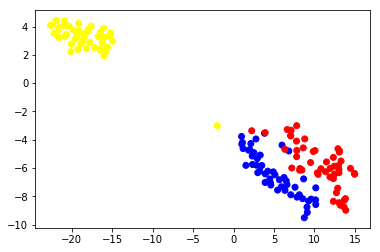

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2).fit_transform(scaled_features)
plt.scatter(tsne[:,0], tsne[:,1],  c=colors)
plt.show()

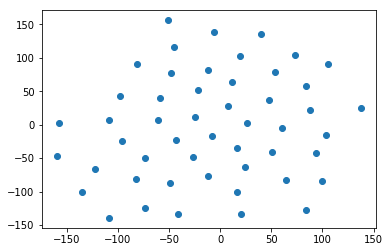

In [16]:
# Litmus test ... does t-sne just produce clusters from random data ... ?

data = np.random.rand(50,10)

scaled_data = preprocessing.scale(data)

tsne = TSNE(n_components=2).fit_transform(scaled_data)
plt.scatter(tsne[:,0], tsne[:,1])
plt.show()

#Conclusion - No, this looks good